#####   Analysis of India Startup Ecosystem based on funding from 2018  - 2019

This project is based on funding received by startup in india between 2018 to 2021. The objective of this project is to provide insights to key stakeholders interested in venturing into the indian startup ecosystem. We will analyze key business metrics in funding received by startups in india. The insights gained will be used by startup management to make data driven decisions about investing in indian market

We will explore the dataset and leverage data vizualization to uncover patterns and information in the dataset.

##### Formulated Questions to our analysis

1. To what extent do cities influence funding (amount,etc)?
2. Which industries are preffered by investors for funding?
3. At which stage do startups get more funding from investors?
4. What is the typical funding amount that startups receive in india?
5. Which type of investors invest the most money?

##### Hypothesis
**Null:** The location of a startup doesn't affect the amount of funding received frominvestors.

**Alternate:** The location of a startup significantly affects the amount of funding issued by investors.

Importation of all necessary libraries

In [2]:
#Libraries
import pyodbc
from  dotenv import dotenv_values    #import dotenv_values function from the dotenv package
import pandas as pd
import numpy as np
from scipy import stats
import os
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import squarify
import re
warnings.filterwarnings("ignore")

Creation of environment variables to hide sensitive information and connect remotely to database

In [3]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [4]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

In [5]:
# Now create the sql query to get the data is what what you see below. 

query1 = "Select * from dbo.LP1_startup_funding2020"

query2 = "Select * from dbo.LP1_startup_funding2021"

In [6]:
#Run the query wih aid of the connection and convert the 2020 data into a dataframe
data_2020 = pd.read_sql(query1, connection)

In [7]:
# Example: Preview of the first few rows of the DataFrame in data1
#NB There's an empty column name column10.
data_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [8]:
#Let us delete the column named column10 because it's missing alot of data. Nearly empty.
#We will use pandas drop method
data_2020= data_2020.drop(["column10"], axis=1)

#Preview of the modified data to confirm change
data_2020.head(3)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed


In [9]:
#Run the query wih aid of the connection and convert the 2021 data into a dataframe
data_2021 = pd.read_sql(query2, connection)

In [10]:
 # Preview of the first five rows of the DataFrame in data2
data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [11]:
#Let us have files of 2020 and 2021 data in csv format
#conversion of 2020 & 2021 data into csv

data_2020.to_csv("startup_funding2020.csv")

data_2021.to_csv("startup_funding2021.csv")

#### I have related indian_start-up data that was stored separately.
The 2018 data was stored in a GitHub repository, and 2019 data was stored in onedrive.
All the data_sets have been collected and saved in my working directory.
We will load all the data using pandas read_csv method for subsequent analysis


let us clean the 2019 dataset
We'll first load it from our working directory

Data Loading

In [14]:
#loading of the csv dataset using the read_csv method.
data = pd.read_csv(r"C:\Users\WORLDAX COMPUTERS\Python Projects\Indian Start-up Ecosystem\Datasets\startup_funding2019.csv", encoding='Latin-1')

data = data.rename(columns={'Amount ($)':'Amount($)','What it does':'What_it_does'})

                                                    
                                      ### Data Exploration
                                                 

In [15]:
#Preview of the first five data using head() method.
data.head(5)

,Company/Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [16]:
#Preview of dataset information summary.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         89 non-null     object 
 4   What_it_does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [18]:
#View of number of rows and columns in 2019 dataset
num_f_colmns = data.shape[(1)]
num_f_rows = data.shape[(0)]

print('Number of rows in 2019 dataset:',num_f_rows)
print('Number of columns in 2019 dataset:',num_f_colmns)

Number of rows in 2019 dataset: 89
Number of columns in 2019 dataset: 9


In [19]:
# Preview of description summary of numerical columns 
#Column data is skewed and has uneven distribution 
data.describe()

,Founded
count,60.000000
mean,2014.533333
std,2.937003
min,2004.000000
25%,2013.000000
50%,2015.000000
75%,2016.250000
max,2019.000000


In [20]:
# Preview of description summary of categorical columns 
data.describe(include=object)

,Company/Brand,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage
count,89,70,89,89,86,89,89,43
unique,87,17,52,88,85,86,50,15
top,Kratikal,Bangalore,Edtech,Online meat shop,"Vivek Gupta, Abhay Hanjura",Undisclosed,Undisclosed,Series A
freq,2,21,7,2,2,3,12,10


In [21]:
#Count of unique values in our data(count of non-NA cells)
data.nunique()

Company/Brand    87
Founded          12
HeadQuarter      17
Sector           52
What_it_does     88
Founders         85
Investor         86
Amount($)        50
Stage            15
dtype: int64

In [22]:
#Let us check for duplicates in our datas
duplicate_vals = data.duplicated().sum()

#The 2019 dataset has no duplicate values
print("Count of duplicate values:",duplicate_vals)

Count of duplicate values: 0


In [23]:
#Check of number of missing values in our dataset.(i.e Total NAN values per column)
missin_vals = data.isnull().sum()

#The 2019 dataset contains missing values
missin_vals

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            0
What_it_does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

In [24]:
#conversion of missing value as percentage to enable comparison and inference
#we get total percentage of missing data in each column

missing_percent = (data.isnull().sum()/len(data)) * 100
missing_percent

Company/Brand     0.000000
Founded          32.584270
HeadQuarter      21.348315
Sector            0.000000
What_it_does      0.000000
Founders          3.370787
Investor          0.000000
Amount($)         0.000000
Stage            51.685393
dtype: float64

In [25]:
#Boolean filtering of percentage missing data greater than 0 in columns
#only columns selected have missing percentage > 0

def missing_percent(table):
    missing_percent = (data.isnull().sum()/len(data)) * 100
    missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
    return missing_percent

In [26]:
# per_nan = percentage NAN (Missing values)
# Columns with missing percentage > 0

per_nan = missing_percent(data)
per_nan

Stage          51.685393
Founded        32.584270
HeadQuarter    21.348315
Founders        3.370787
dtype: float64

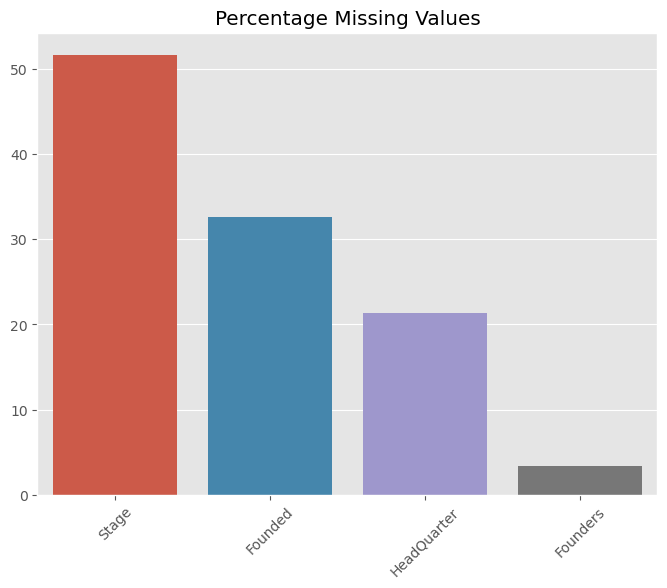

In [27]:
#Let us visualize to infer missing data for comprehensive understanding
#NB per_nan is a series data that is indexed(with only one column)
#NBseaborn and matplotlib are compatible, we'll us matplotlib's 'plt.xticks()' to do x-axis rotation 

plt.figure(figsize=(8, 6))
sns.barplot(x=per_nan.index, y=per_nan)
plt.xticks(rotation = 45)
plt.title("Percentage Missing Values");

                                               **DATA CLEANING**

Cleaning 'Amount' column

In [28]:
#Handing inconsistencies in 'Amount' column
# Remove dollar sign('$'), ',' and 'undisclosed'
data['Amount($)'] = data['Amount($)'].str.replace('[$,]', '', regex=True) 

#Replace "undisclosed" with NaN
data['Amount($)'] = data['Amount($)'].replace('Undisclosed', np.nan)

#Conversion of Amount Column from Object to float
data['Amount($)'].astype("float64")

0       6300000.0
1     150000000.0
2      28000000.0
3      30000000.0
4       6000000.0
         ...     
84     20000000.0
85    693000000.0
86      5000000.0
87     50000000.0
88     33000000.0
Name: Amount($), Length: 89, dtype: float64

In [30]:
# Let us find out count of missing values in 'Amount' column
missin_amount_vals = data["Amount($)"].isna().sum()

print("Count of missing values in Amount column:",missin_amount_vals)

Count of missing values in Amount column: 12


In [31]:
#What's count of Non-NA elements in the column 'amount'

#DataFrame.count() method returns count of Non-NA/null entries

Non_NA = data["Amount($)"].count()

print("Count of non-NA elements in Amount column:",Non_NA)

Count of non-NA elements in Amount column: 77


In [32]:
#Convert the column to numeric, coercing non-numeric values to NaN:
#pd.to_numeric() converts values to float
data["Amount($)"] = pd.to_numeric(data["Amount($)"], errors='coerce')

#Calculate the median of the column, ignoring the NaN values:
median_value = data["Amount($)"].median(skipna=True)

median_value

6000000.0

In [33]:
#Replace the NaN values in 'Amount' with the calculated median:
data["Amount($)"].fillna(median_value, inplace=True)

In [34]:
#confirm whether there are any NAN values (missing_values)
data["Amount($)"].isna().values.any()

False

Cleaning of 'Founded' column

In [35]:
#let us clean column named 'founded' 
#Column has outliers/skewed data
#Check of unique elements

elements = data["Founded"].unique()
elements

array([  nan, 2014., 2004., 2013., 2010., 2018., 2019., 2017., 2011.,
       2015., 2016., 2012., 2008.])

In [36]:
#Count of missing values in column 'founded'

missn_vals = data["Founded"].isna().sum()
missn_vals 

29

In [37]:
#Calculate the median of the column, ignoring the NaN values:
median_value = data["Founded"].median(skipna=True)
median_value

2015.0

In [38]:
#Replace the NaN values with the calculated median:
data["Founded"].fillna(median_value, inplace=True)

In [39]:
#Any missing values left in the column?
#confirm whether there are any NAN values (missing_values)
data["Founded"].isna().values.any()

False

Cleaning 'Headquarter' column

In [40]:
#Let us use unique() method to examine the unique values in the column:
data['HeadQuarter'].unique()

array([nan, 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Bangalore',
       'Noida', 'Delhi', 'Ahmedabad', 'Gurugram', 'Haryana', 'Chandigarh',
       'Jaipur', 'New Delhi', 'Surat', 'Uttar pradesh', 'Hyderabad',
       'Rajasthan'], dtype=object)

In [41]:
#Calculate the mode of the column:
#The mode() function returns a pandas Series object that contains the mode(s) of the column.
#The iloc indexer is used to retrieve the first value from the mode result.

mode_value = data["HeadQuarter"].mode().iloc[0]
mode_value

'Bangalore'

In [42]:
#Since column has a few missing cities, will fill up them with the mode(most occuring instance)
#Replace the missing values with the mode:
data["HeadQuarter"].fillna(mode_value, inplace=True)

In [43]:
#Any missing values after changes?
#Let us confirm whether there are any NAN values after changes
data["HeadQuarter"].isna().values.any()

False

### Sector Column
Cleaning of 'Sector' column. Column has inconsistencies and some elements need to be renamed to have consistent names.      
We will create a function that groups similar sub-sectors into one sector in order to minimise the categories

***use of unique() method to examine the unique values***

In [44]:
#Unique elements
print(data["Sector"].unique())

['Ecommerce' 'Edtech' 'Interior design' 'AgriTech' 'Technology' 'SaaS'
 'AI & Tech' 'E-commerce' 'E-commerce & AR' 'Fintech' 'HR tech'
 'Food tech' 'Health' 'Healthcare' 'Safety tech' 'Pharmaceutical'
 'Insurance technology' 'AI' 'Foodtech' 'Food' 'IoT' 'E-marketplace'
 'Robotics & AI' 'Logistics' 'Travel' 'Manufacturing' 'Food & Nutrition'
 'Social Media' 'E-Sports' 'Cosmetics' 'B2B' 'Jewellery'
 'B2B Supply Chain' 'Games' 'Food & tech' 'Accomodation' 'Automotive tech'
 'Legal tech' 'Mutual Funds' 'Cybersecurity' 'Automobile' 'Sports'
 'Healthtech' 'Yoga & wellness' 'Virtual Banking' 'Transportation'
 'Transport & Rentals' 'Marketing & Customer loyalty' 'Infratech'
 'Hospitality' 'Automobile & Technology' 'Banking']


In [45]:
#Any NAN values?
data["Sector"].isna().sum()

0

In [46]:
#Check of counts of each category in the sector column
data["Sector"].value_counts().sort_values(ascending=False)

Edtech                          7
Fintech                         6
Technology                      6
AgriTech                        4
SaaS                            4
Logistics                       3
Automobile                      3
E-commerce                      3
Automotive tech                 2
Accomodation                    2
B2B                             2
AI                              2
E-marketplace                   2
Food                            2
Foodtech                        2
IoT                             2
HR tech                         2
Safety tech                     1
Interior design                 1
AI & Tech                       1
E-commerce & AR                 1
Food tech                       1
Health                          1
Healthcare                      1
Cosmetics                       1
Pharmaceutical                  1
Insurance technology            1
Robotics & AI                   1
Travel                          1
Manufacturing 

Function that Groups Similar subsectors into one 

In [48]:
def sector_redistribution(Sector):

    Sector = Sector.lower()  # Convert sector to lowercase for case-insensitive matching
    
    if re.search(r'\b(virtual banking|fintech|banking|mutual funds|insurance technology)\b', Sector):
        return 'Finance'   
     # use of word boundaries (\b) to avoid partial word matches. This ensures that only whole words are matched.
    
    elif re.search(r'\b(ecommerce|e-commerce|e-commerce & ar|e-marketplace|b2b|b2b supply chain)\b', Sector):
        return 'E-commerce' 
    
    elif re.search(r'\b(edtech)\b', Sector):
        return 'Education'
    
    elif re.search(r'\b(agritech)\b', Sector):
        return 'Agriculture'

    elif re.search(r'\b(technology|saas|ai & tech|safety tech|ai|iot|robotics & ai|legal tech|infratech|cybersecurity|social media)\b', Sector):
        return 'Technology'
    
    elif re.search(r'\b(interior design|jewellery|cosmetics|yoga & wellness)\b', Sector):
        return 'Lifestyle'
    
    elif re.search(r'\b(hr tech)\b', Sector):
        return 'Human Resources'
    
    elif re.search(r'\b(foodtech|food & tech|food|food & nutrition)\b', Sector):
        return 'Food & Beverage'
    
    elif re.search(r'\b(health|healthcare|healthtech|pharmaceutical)\b', Sector):
        return 'Health'
    
    elif re.search(r'\b(marketing & customer loyalty)\b', Sector):
        return 'Marketing and Advertising'
    
    elif re.search(r'\b(manufacturing)\b', Sector):
        return 'Manufacturing'
    
    elif re.search(r'\b(logistics|automotive tech|automobile|automobile & technology|transportation|transport & rentals)\b', Sector):
        return 'Transportation & Logistics'
    
    elif re.search(r'\b(travel|accomodation|hospitality)\b', Sector):
        return 'Hospitality'
    
    elif re.search(r'\b(e-sports|games|sports)\b', Sector): 
        return 'Sports'
    
    else:
        return Sector


In [49]:
#Calling upon the function created above to effect changes
data["Sector"] = data["Sector"].apply(sector_redistribution)

In [50]:
#Have changes been made succesfully? Absolutely yes!
data["Sector"].unique()

array(['E-commerce', 'Education', 'Lifestyle', 'Agriculture',
       'Technology', 'Finance', 'Human Resources', 'Food & Beverage',
       'Health', 'Transportation & Logistics', 'Hospitality',
       'Manufacturing', 'Sports', 'Marketing and Advertising'],
      dtype=object)

In [51]:
#Check of unique counts after changes
data["Sector"].nunique()

14

Cleaning 'Founders' Column

In [52]:
# View of NaN values in 'Founders' column
nan_val = data[data["Founders"].isna()]
nan_val

,Company/Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage
39,Lil Goodness and sCool meal,2015.0,Bangalore,Food & Beverage,It empowers moms to provide the best of foods ...,NaN,"Sajan Pillai, Muthu Krishnan,",400000.0,NaN
41,VMate,2015.0,Bangalore,Technology,A short video platform,NaN,Alibaba,100000000.0,NaN
71,Smart Institute,2015.0,Surat,Education,A platform to learn online,NaN,HNI investors,1500000.0,NaN


In [54]:
# We will fill missing values with "Unknown" in the 'Founders' column
data['Founders'] = data['Founders'].fillna("Unknown")

#Any missing values?
#Let us confirm whether there are any NAN values after changes
data["Founders"].isna().values.any()

False

Cleaning of 'Stage' Column

In [55]:
#Column has inconsistencies
data['Stage'].unique()

array([nan, 'Series C', 'Fresh funding', 'Series D', 'Pre series A',
       'Series A', 'Series G', 'Series B', 'Post series A',
       'Seed funding', 'Seed fund', 'Series E', 'Series F', 'Series B+',
       'Seed round', 'Pre-series A'], dtype=object)

In [56]:
#Replace the NaN values with 'Unknown':
data["Stage"].fillna("Unknown", inplace=True)

In [57]:
#Any missing values left? I think none, great!
missn_vals = data["Stage"].isna().sum()
missn_vals 

0

Creation of a stage recategorization function to clear inconsistency

In [58]:
def Stage_recategorization(Stage):
# use of word boundaries (\b) to avoid partial word matches. This ensures that only whole words are matched.
    
    if re.search(r'\b(Pre series A|Pre-series A)\b', Stage):
        return 'Pre-series A'   
     
    elif re.search(r'\b(Series B|Series B+)\b', Stage):
        return 'Series B' 
    
    elif re.search(r'\b(Seed round|Seed fund|Seed round|Fresh funding)\b', Stage):
        return 'Seed'
    
    elif re.search(r'\b(Series D|Series E|Series F|Series G|Post series A)\b', Stage):
        return 'Later Stage'
    
    elif re.search(r'\b(Unknown)\b', Stage):
        return 'Unknown Stage'
    
    else:
        return Stage

In [59]:
#Make Changes to stage using the created function
data["Stage"] = data["Stage"].apply(Stage_recategorization)

In [60]:
#Any missing values after changes?
#confirm whether there are any NAN values (missing_values)
data["Stage"].isna().values.any()

False

In [61]:
#check of information summary of the cleaned 2019 data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        89 non-null     float64
 2   HeadQuarter    89 non-null     object 
 3   Sector         89 non-null     object 
 4   What_it_does   89 non-null     object 
 5   Founders       89 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     float64
 8   Stage          89 non-null     object 
dtypes: float64(2), object(7)
memory usage: 6.4+ KB


In [62]:
#Saving a copy of the csv file to working directory
data.to_csv(r"C:\Users\WORLDAX COMPUTERS\Python Projects\Indian Start-up Ecosystem\Datasets\startup_funding2019(Clean_Data).csv")

#####   FINAL DATASET
Cleaning process was done to all the datasets followed by concatenation into one dataframe.

Loading of all clean datasets is done below.

In [64]:
# Loading of all datasets for concatenation (2018, 2019, 2020,2021)
data_18 = pd.read_csv(r"C:\Users\WORLDAX COMPUTERS\Python Projects\Indian Start-up Ecosystem\Datasets\data_cleaning_2018.csv")
data_19 = pd.read_csv(r"C:\Users\WORLDAX COMPUTERS\Python Projects\Indian Start-up Ecosystem\Datasets\startup_funding2019(Clean_Data).csv")
data_20 = pd.read_csv(r"C:\Users\WORLDAX COMPUTERS\Python Projects\Indian Start-up Ecosystem\Datasets\IndiaClean_2020_data.csv")
data_21 = pd.read_csv(r"C:\Users\WORLDAX COMPUTERS\Python Projects\Indian Start-up Ecosystem\Datasets\IndiaClean_2021_data.csv")

In [65]:
#A look into the data information of the 2018 dataset
data_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  524 non-null    object 
 1   Stage          524 non-null    object 
 2   Amount($)      524 non-null    float64
 3   Location       524 non-null    object 
 4   What_it_does   524 non-null    object 
 5   Sector         524 non-null    object 
dtypes: float64(1), object(5)
memory usage: 24.7+ KB


In [66]:
#renaming the location column in the 2018 dataset
data_18.rename(columns={'Location':'HeadQuarter'}, inplace=True)
data_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  524 non-null    object 
 1   Stage          524 non-null    object 
 2   Amount($)      524 non-null    float64
 3   HeadQuarter    524 non-null    object 
 4   What_it_does   524 non-null    object 
 5   Sector         524 non-null    object 
dtypes: float64(1), object(5)
memory usage: 24.7+ KB


In [67]:
#A look into the data information of the 2019 dataset
data_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     89 non-null     int64  
 1   Company/Brand  89 non-null     object 
 2   Founded        89 non-null     float64
 3   HeadQuarter    89 non-null     object 
 4   Sector         89 non-null     object 
 5   What_it_does   89 non-null     object 
 6   Founders       89 non-null     object 
 7   Investor       89 non-null     object 
 8   Amount($)      89 non-null     float64
 9   Stage          89 non-null     object 
dtypes: float64(2), int64(1), object(7)
memory usage: 7.1+ KB


In [68]:
#drop the 'unnamed: 0' column
data_19 = data_19.drop('Unnamed: 0', axis=1)
#Are changes effected? Yes
data_19.head(2)

,Company/Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,2015.0,Bangalore,E-commerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,Unknown Stage
1,Ruangguru,2014.0,Mumbai,Education,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C


In [69]:
#A look into the data information of the 2020 dataset
data_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1055 non-null   object 
 1   Founded        1055 non-null   int64  
 2   HeadQuarter    1055 non-null   object 
 3   Sector         1055 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1055 non-null   object 
 6   Investor       1055 non-null   object 
 7   Amount($)      1055 non-null   float64
 8   Stage          1055 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 74.3+ KB


In [70]:
#A look into the data information of the 2021 dataset
data_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1180 non-null   object 
 1   Founded        1180 non-null   int64  
 2   HeadQuarter    1180 non-null   object 
 3   Sector         1180 non-null   object 
 4   What_it_does   1180 non-null   object 
 5   Founders       1180 non-null   object 
 6   Investor       1180 non-null   object 
 7   Amount($)      1180 non-null   float64
 8   Stage          1180 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 83.1+ KB


In [71]:
#Add a funding year to all datasets
data_18['Funding_Year'] = '2018'
data_19['Funding_Year'] = '2019'
data_20['Funding_Year'] = '2020'
data_21['Funding_Year'] = '2021'

In [72]:
#Merge all datasets

df = pd.concat([data_18, data_19, data_20, data_21])

In [73]:
#Save a copy of the merged dataset
#If not saving the csv in current working directory, define file path to directory of choice on your desktop

df.to_csv('Indian_Startup_Analysis_Merged_datasets(clean).csv')

In [75]:
#We will read the new combined datasets
df = pd.read_csv(r"C:\Users\WORLDAX COMPUTERS\Python Projects\Indian Start-up Ecosystem\Datasets\Indian_Startup_Analysis_Merged_datasets(clean).csv")

In [76]:
#Preview of Information summary of combined data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2848 non-null   int64  
 1   Company/Brand  2848 non-null   object 
 2   Stage          2848 non-null   object 
 3   Amount($)      2848 non-null   float64
 4   HeadQuarter    2848 non-null   object 
 5   What_it_does   2848 non-null   object 
 6   Sector         2848 non-null   object 
 7   Funding_Year   2848 non-null   int64  
 8   Founded        2324 non-null   float64
 9   Founders       2324 non-null   object 
 10  Investor       2324 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 244.9+ KB


In [77]:
#We will drop 'Unnamed: 0' column
df = df.drop('Unnamed: 0', axis=1)
#Preview of information summary after changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2848 non-null   object 
 1   Stage          2848 non-null   object 
 2   Amount($)      2848 non-null   float64
 3   HeadQuarter    2848 non-null   object 
 4   What_it_does   2848 non-null   object 
 5   Sector         2848 non-null   object 
 6   Funding_Year   2848 non-null   int64  
 7   Founded        2324 non-null   float64
 8   Founders       2324 non-null   object 
 9   Investor       2324 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 222.6+ KB


##### Exploratory Data Analysis : EDA

In this section we will inspect the datasets in depth and conduct a univariate, bivariate and multivariate analysis.

We will test the hypothesis to further understand the trends and patterns in the dataset.

In [78]:
# We will fill empty entries in the Founded, Founders anf Investor columns.
# The missing values are as result of the absence of these three columns in the 2018 dataset.
# Let us fill missing values in the founded column with the mode value, and the rest with 'Unknown'

df['Founded'] = df['Founded'].fillna(df['Founded'].mode()[0]).astype(int)
df['Founders'].fillna('unknown', inplace=True)
df['Investor'].fillna('unknown', inplace=True)

In [79]:
#Preview of first five rows in data
df.head()

,Company/Brand,Stage,Amount($),HeadQuarter,What_it_does,Sector,Funding_Year,Founded,Founders,Investor
0,TheCollegeFever,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",Media & Entertainment,2018,2016,unknown,unknown
1,Happy Cow Dairy,Seed,1000000.0,Mumbai,A startup which aggregates milk from dairy far...,Agriculture,2018,2016,unknown,unknown
2,MyLoanCare,Series A,1000000.0,Gurgaon,Leading Online Loans Marketplace in India,Finance,2018,2016,unknown,unknown
3,PayMe India,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,Finance,2018,2016,unknown,unknown
4,Eunimart,Seed,1000000.0,Hyderabad,Eunimart is a one stop solution for merchants ...,E-commerce,2018,2016,unknown,unknown


In [80]:
#Check of rows and columns in the combined dataframe
df.shape

(2848, 10)

In [81]:
#Preview of statistics
df.describe(include='all')

,Company/Brand,Stage,Amount($),HeadQuarter,What_it_does,Sector,Funding_Year,Founded,Founders,Investor
count,2848,2848,2.848000e+03,2848,2848,2848,2848.000000,2848.000000,2848,2848
unique,2213,15,NaN,124,2688,25,NaN,NaN,1982,1778
top,BharatPe,Seed,NaN,Bangalore,Provides online learning classes,Technology,NaN,NaN,unknown,unknown
freq,10,689,NaN,978,5,554,NaN,NaN,536,562
mean,NaN,NaN,9.837547e+07,NaN,NaN,NaN,2020.015098,2016.034410,NaN,NaN
std,NaN,NaN,3.102321e+09,NaN,NaN,NaN,1.087068,3.739997,NaN,NaN
min,NaN,NaN,7.500000e+03,NaN,NaN,NaN,2018.000000,1963.000000,NaN,NaN
25%,NaN,NaN,1.000000e+06,NaN,NaN,NaN,2020.000000,2015.000000,NaN,NaN
50%,NaN,NaN,3.000000e+06,NaN,NaN,NaN,2020.000000,2016.000000,NaN,NaN
75%,NaN,NaN,7.225000e+06,NaN,NaN,NaN,2021.000000,2018.000000,NaN,NaN


From statistics above, we have three numeric columns and the rest are objects. The amount column values are very skewed based on the difference in mean and standard deviation. This suggests that the variability of the data is high, and there is a wider range of values in the column. Imputation of the empty entries in the Founded, Founders and Investor columns to unknown has affected  the frequency of these columns

In [82]:
#Let us check for missing values
df.isnull().sum()

Company/Brand    0
Stage            0
Amount($)        0
HeadQuarter      0
What_it_does     0
Sector           0
Funding_Year     0
Founded          0
Founders         0
Investor         0
dtype: int64

In [83]:
#Check of unique counts in sector column
df['Sector'].unique()

array(['Media & Entertainment', 'Agriculture', 'Finance', 'E-commerce',
       'Technology', 'Lifestyle', 'Services',
       'Transportation & Logistics', 'Engineering', 'Food & Beverage',
       'Healthcare', 'Education', 'Retail', 'Energy', 'Hospitality',
       'Sports', 'Real Estate', 'Manufacturing', 'Human Resources',
       'Health', 'Marketing and Advertising', 'Food and Beverages',
       'Marketing and advertising', 'Accomodation', 'Food & Beverages'],
      dtype=object)

In [84]:
#Replacing similar names in the sector column
df['Sector'].replace(['Marketing and advertising','Food and Beverages','Food & Beverage' ],['Marketing and Advertising','Food & Beverages','Food & Beverages'], inplace=True)

In [85]:
#Count of unique categories in column
df['Sector'].value_counts()

Technology                    554
Finance                       477
Education                     295
Healthcare                    181
E-commerce                    177
Media & Entertainment         141
Transportation & Logistics    135
Food & Beverages              135
Retail                        104
Health                        100
Agriculture                    91
Lifestyle                      89
Services                       81
Manufacturing                  76
Real Estate                    51
Human Resources                34
Engineering                    31
Hospitality                    28
Energy                         27
Sports                         24
Accomodation                    9
Marketing and Advertising       8
Name: Sector, dtype: int64

In [86]:
#Check of unique counts in HeadQuarter column
df['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad',
       'Bengaluru', 'Kalkaji', 'Delhi', 'India', 'Hubli', 'New Delhi',
       'Chennai', 'Mohali', 'Kolkata', 'Pune', 'Jodhpur', 'Kanpur',
       'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin', 'Faridabad', 'Jaipur',
       'Kota', 'Anand', 'Bangalore City', 'Belgaum', 'Thane', 'Margão',
       'Indore', 'Alwar', 'Kannur', 'Trivandrum', 'Ernakulam',
       'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore', 'Ghaziabad',
       'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore',
       'Worli', 'Alleppey', 'Chandigarh', 'Guindy', 'Lucknow',
       'Telangana', 'Gurugram', 'Surat', 'Uttar pradesh', 'Rajasthan',
       'Tirunelveli', 'Singapore', 'Gujarat', 'Kerala', 'Frisco',
       'California', 'Dhingsara', 'New York', 'Patna', 'San Francisco',
       'San Ramon', 'Paris', 'Plano', 'Sydney', 'Bangaldesh', 'London',
       'Milano', 'Palmwoods', 'France', 'Samastipur', 'Irvine', 'Tumkur',
       'Newcastle', 'Sha

In [87]:
#Change of inconsistent name in 'HeadQuarter' column

df['HeadQuarter'] = df['HeadQuarter'].replace({'Ahmadabad': 'Ahmedabad', 'Bangalore City': 'Bangalore', 'Bengaluru':'Bangalore', 'Gurugram\t#REF!':'Gurugram'})

In [88]:
#let us check for duplicates
df.duplicated().sum()

3

In [89]:
#Check the duplicated rows
df.loc[df.duplicated()]

,Company/Brand,Stage,Amount($),HeadQuarter,What_it_does,Sector,Funding_Year,Founded,Founders,Investor
758,Krimanshi,Seed,600000.0,Jodhpur,Krimanshi aims to increase rural income by imp...,Technology,2020,2015,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City"
818,Nykaa,Unknown Stage,3000000.0,Mumbai,Nykaa is an online marketplace for different b...,Manufacturing,2020,2012,Falguni Nayar,"Alia Bhatt, Katrina Kaif"
975,Byju’s,Unknown Stage,500000000.0,Bangalore,An Indian educational technology and online tu...,Education,2020,2011,Byju Raveendran,"Owl Ventures, Tiger Global Management"


In [90]:
#Checking an example of duplicated data
df.query('`Company/Brand`=="Krimanshi"')

,Company/Brand,Stage,Amount($),HeadQuarter,What_it_does,Sector,Funding_Year,Founded,Founders,Investor
742,Krimanshi,Seed,600000.0,Jodhpur,Krimanshi aims to increase rural income by imp...,Technology,2020,2015,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City"
758,Krimanshi,Seed,600000.0,Jodhpur,Krimanshi aims to increase rural income by imp...,Technology,2020,2015,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City"
1554,Krimanshi,Unknown Stage,20000.0,Jodhpur,Sustainable system to feed animals by valorizi...,Agriculture,2020,2016,Nikhil Bohra,Arunachal Pradesh Social Entrepreneurship Meet


In [91]:
#Checking another example of duplicated data
df.query('`Company/Brand`=="Nykaa"')

,Company/Brand,Stage,Amount($),HeadQuarter,What_it_does,Sector,Funding_Year,Founded,Founders,Investor
511,Nykaa,Equity,1000000.0,Mumbai,Nykaa.com is a premier online beauty and welln...,Lifestyle,2018,2016,unknown,unknown
733,Nykaa,Unknown Stage,3000000.0,Mumbai,Nykaa is an online marketplace for different b...,Manufacturing,2020,2012,Falguni Nayar,"Alia Bhatt, Katrina Kaif"
818,Nykaa,Unknown Stage,3000000.0,Mumbai,Nykaa is an online marketplace for different b...,Manufacturing,2020,2012,Falguni Nayar,"Alia Bhatt, Katrina Kaif"
826,Nykaa,Unknown Stage,3000000.0,Mumbai,Nykaa is an online marketplace for different b...,E-commerce,2020,2012,Falguni Nayar,"Katrina Kaif, Steadview Capital"
953,Nykaa,Unknown Stage,24700000.0,Mumbai,Cosmetics & beauty products online,Lifestyle,2020,2012,Falguni Nayar,Steadview Capital
1325,Nykaa,Unknown Stage,8800000.0,Mumbai,Deals in cosmetic and wellness products,E-commerce,2020,2012,Falguni Nayar,Steadview capital
1426,Nykaa,Unknown Stage,13137000.0,Mumbai,Deals in cosmetic and wellness products,E-commerce,2020,2012,Falguni Nayar,Steadview capital


In [92]:
#Locking rows without duplicates
#Remove duplicate rows based on the specified subset of columns

df=df.loc[~df.duplicated(subset=['Sector','Company/Brand','Stage','Amount($)','HeadQuarter','What_it_does','Founded','Founders','Investor'])].reset_index(drop=True).copy()

In [93]:
#Any duplictes left? Great! None are left
df.duplicated().sum()

0

In [94]:
#Look of the new dataframe shape
df.shape

(2845, 10)

##### Feature Processing

We have a business question that aims to answer whether the age of the startup affects  funding. Hence,we need to add a new column which calculates this age by subtracting the funding year from the year the startup was founded.

In [95]:
#Creation of a new atribute called startup age
df["Startup_Age"] = abs(df["Funding_Year"] - df["Founded"])

##### Modelling

## Visualization

Analysis of Amount attribute

In [96]:
#View of column statistics
df['Amount($)'].describe()

count    2.845000e+03
mean     9.830219e+07
std      3.103947e+09
min      7.500000e+03
25%      1.000000e+06
50%      3.000000e+06
75%      7.200000e+06
max      1.500000e+11
Name: Amount($), dtype: float64

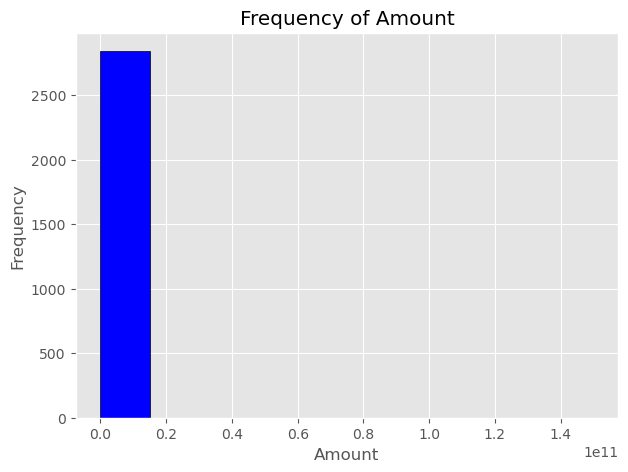

In [97]:
# now lets show the frequency distribution
plt.figure(figsize=(7,5))
plt.hist(df['Amount($)'],bins=10, color='blue', edgecolor='black')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Frequency of Amount')
plt.show();

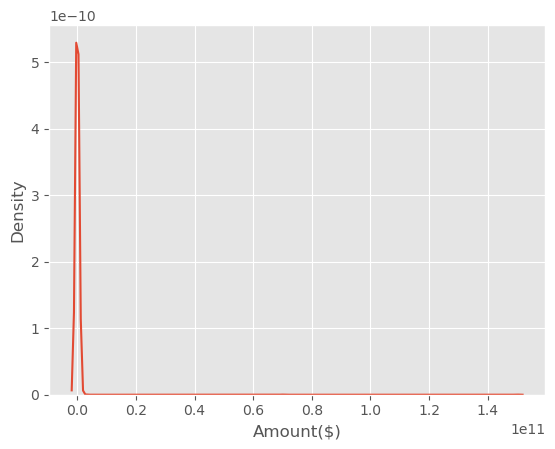

In [99]:
# lets plot a distribution plot to show the skewness in detail
sns.kdeplot(x='Amount($)',data=df);

The distribution plot shows in detail the skewness of the Amount attribute of the dataset and it indicates a positively skewed distribution.

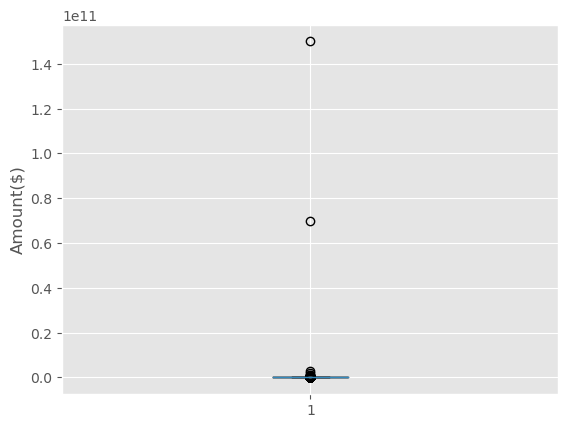

In [100]:
# lets Create a box plot to have a look at the outliers in the amount attribute
plt.boxplot(df['Amount($)'])
plt.ylabel('Amount($)')
plt.show()

the "Amount" column contains outliers which need to be removed before moving further. Here's how to remove the outliers:

In [101]:
# Calculate the IQR (Interquartile Range)
Q1 = df['Amount($)'].quantile(0.25)
Q3 = df['Amount($)'].quantile(0.75)
IQR = Q3 - Q1

# define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# remove outliers by filtering
df = df[(df['Amount($)'] >= lower_bound) & (df['Amount($)'] <= upper_bound)]

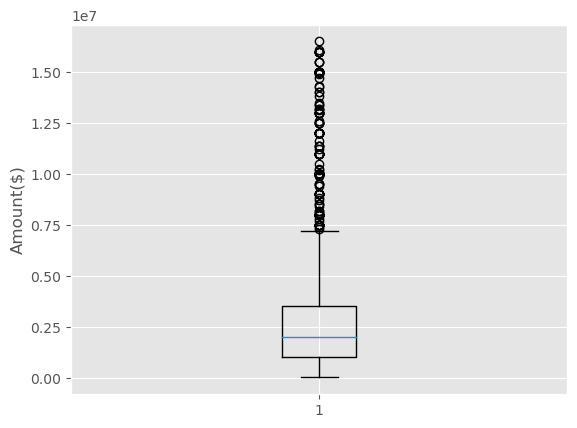

In [102]:
#  box plot after removing the outliers in the amount attribute
plt.boxplot(df['Amount($)'])
plt.ylabel('Amount($)')
plt.show()

Analysis of the company attribute

In [103]:
# now lets have a look at the distribution of company column:
company_count = df['Company/Brand'].value_counts().head(10)
company_count

Nykaa            5
BharatPe         5
Origo            4
Instoried        4
Eggoz            4
Lido Learning    4
PumPumPum        4
F5               4
Furlenco         4
LetsTransport    4
Name: Company/Brand, dtype: int64

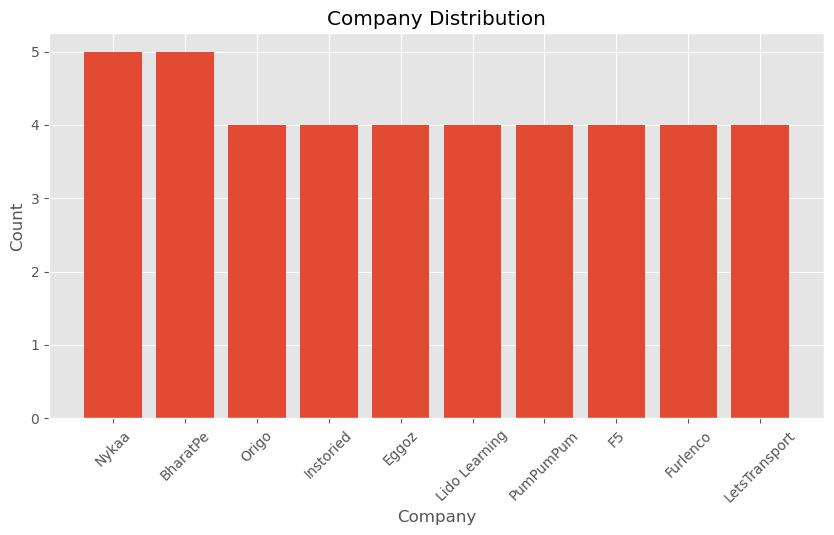

In [104]:
# lets see the distribution of the first 10 companies
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.bar(company_count.index,company_count.values, align='center')
plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Company Distribution')
plt.show();

Nykaa and BharatPe companies has the highest number of startups



Analysis of the location attribute

In [105]:
# now lets have a look at the distribution of company column:
location_count = df['HeadQuarter'].value_counts().head(5)
location_count

Bangalore    825
Mumbai       388
New Delhi    202
Gurugram     186
Chennai       92
Name: HeadQuarter, dtype: int64

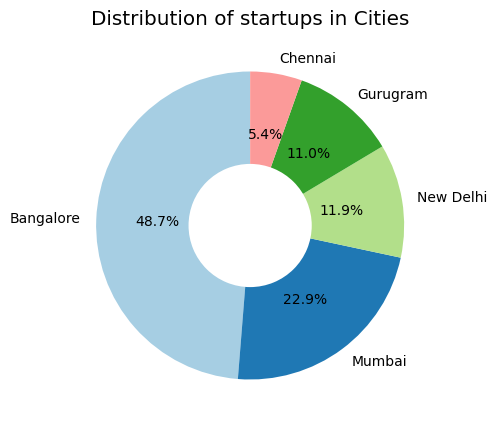

In [106]:
# lets see the distribution of the top 5 locations
fig, ax = plt.subplots(figsize=(10, 5))
# Draw the outer pie chart
outer_colors = plt.cm.Paired(range(len(location_count)))
ax.pie(location_count.values, labels=location_count.index, colors=outer_colors, radius=1, autopct='%1.1f%%', startangle=90)
# Draw the inner pie chart to create the doughnut effect
ax.pie([1], colors='white', radius=0.4)
ax.set(aspect='equal')
plt.title('Distribution of startups in Cities')
plt.show()

Bangalore, Mumbai, and New Delhi cities contain the highest number of startups

Analysis of the Sector attribute

In [107]:
# now lets have a look at the distribution of the sector column:
sector_count = df['Sector'].value_counts().head(10)
sector_count

Technology                    490
Finance                       369
Education                     250
Healthcare                    154
E-commerce                    138
Media & Entertainment         117
Food & Beverages              112
Transportation & Logistics    103
Health                         92
Retail                         86
Name: Sector, dtype: int64

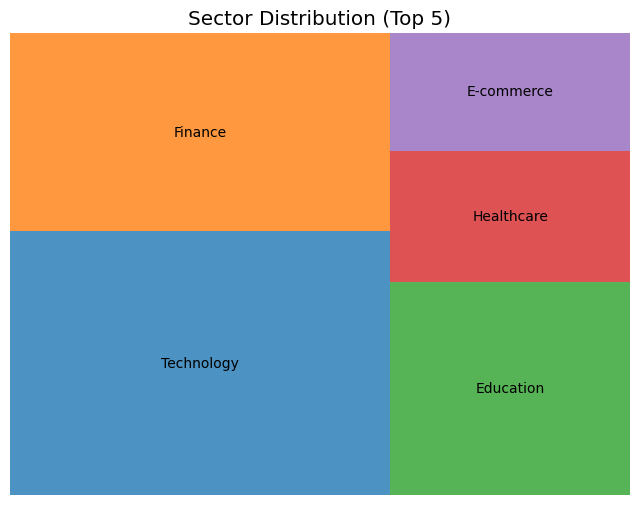

In [108]:
#We imported squarify module at the start 
# Calculate the count of each 'Sector'
sector_count = df['Sector'].value_counts().head(5)

# Create a custom color palette for the TreeMap
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Create the TreeMap with custom colors
plt.figure(figsize=(8, 6))
squarify.plot(sizes=sector_count.values, label=sector_count.index, alpha=0.8, color=colors)

# Set labels and title
plt.axis('off')
plt.title('Sector Distribution (Top 5)')
plt.show()

Technology is the most preffered sector by investors

Analysis of the Stage attribute

In [109]:
# Lets look at the unique values in the stage column
df['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed', 'Equity',
       'Unknown Stage', 'Grant', 'Debt Financing', 'Later Stage',
       'Series C', 'Pre-series A', 'Seed funding', 'Pre-Series',
       'Unknown'], dtype=object)

In [110]:
# replace similar categories in stage column
df['Stage']=df['Stage'].replace('Unknown Stage','Unknown')

In [111]:
# now lets have a look at the distribution of the 'Stage' column:
# Filter out the rows with 'unknown' in the 'Stage' column
filtered_df = df[df['Stage'] != 'Unknown']
# Get the value counts of the 'Stage' column and select the top 5 values
stage_count = filtered_df['Stage'].value_counts().head(5)
stage_count

Seed          682
Series A      287
Pre-Series    229
Pre-Seed      121
Series B       77
Name: Stage, dtype: int64

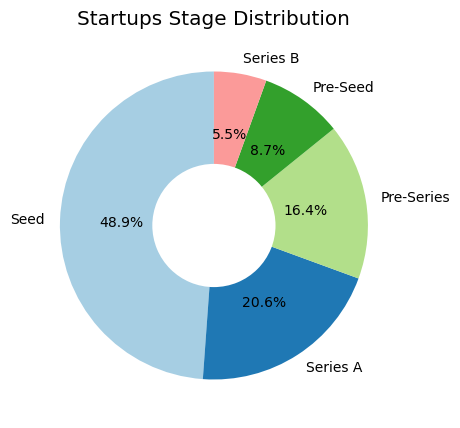

In [112]:
# lets see the distribution of the top 5 funding stages
fig, ax = plt.subplots(figsize=(10, 5))
outer_colors = plt.cm.Paired(range(len(stage_count)))
ax.pie(stage_count.values, labels=stage_count.index, colors=outer_colors, radius=1, autopct='%1.1f%%', startangle=90)
ax.pie([1], colors='white', radius=0.4)
ax.set(aspect='equal')
plt.title('Startups Stage Distribution')
plt.show()

48.9% of the startups are funded at the seed stage followed by Series A and Pre-Series stages with 20.6% and 16.4% respectively.

##### Analysis of the investor attribute

In [113]:
df['Investor'].value_counts().head()

unknown                      525
Inflection Point Ventures     81
Venture Catalysts             32
Mumbai Angels Network         17
Angel investors               15
Name: Investor, dtype: int64

In [114]:
#Column has some umdisclosed investors
df.query('`Investor`=="Undisclosed"')

,Company/Brand,Stage,Amount($),HeadQuarter,What_it_does,Sector,Funding_Year,Founded,Founders,Investor,Startup_Age
529,FlytBase,Unknown,6000000.0,Pune,A drone automation platform,Technology,2019,2015,Nitin Gupta,Undisclosed,4
583,WishADish,Unknown,6000000.0,Delhi,Provides management solution for restaurants,Food & Beverages,2019,2015,"Sawan Kumar, Bhavya Bhambhani",Undisclosed,4
594,Zebu,Seed,4000000.0,Bangalore,Platform uses encryption technology to allow b...,Technology,2019,2015,Team of Waterloo-based software developers,Undisclosed,4
1243,Instasolv,Pre-Seed,2000000.0,Noida,It is a doubt-solving app for students from Cl...,Education,2020,2019,"Aditya Singhal, Nishant Sinha, Bahul Arora",Undisclosed,1
1351,MYSUN,Pre-Seed,4257000.0,Delhi,Platform for rooftop solar energy solutions,Technology,2020,2015,"Gagan Vermani, Divyanshu Sachdev, Gyan Prakash...",Undisclosed,5
1434,SnackAmor,Seed,3000000.0,Mumbai,It offers various healthy snacks,Food & Beverages,2020,2016,Deepak Grover,Undisclosed,4
1512,Yolo,Seed,600000.0,Gurugram,Intercity transportation,Transportation & Logistics,2020,2019,"Shailesh Gupta, Mukul Shah, Danish Chopra",Undisclosed,1
1574,Yolo,Seed,600000.0,Gurugram,Intercity transportation startup,Transportation & Logistics,2020,2019,"Shailesh Gupta, Mukul Shah, Danish Chopra",Undisclosed,1
1613,Dealberg,Unknown,3000000.0,Bangalore,Deals in office supplies,E-commerce,2020,2016,Abhishek Emmanuel,Undisclosed,4
1616,Capital Quotient,Unknown,600000.0,Bangalore,Investment advisor,Finance,2020,2016,Sousthav Chakrabarty,Undisclosed,4


In [115]:
#Let us replace them with unknown
df['Investor'] = df['Investor'].replace('Undisclosed', 'unknown')

In [116]:
#Check on changes
df['Investor'].value_counts().head()

unknown                      536
Inflection Point Ventures     81
Venture Catalysts             32
Mumbai Angels Network         17
Angel investors               15
Name: Investor, dtype: int64

In [117]:
# now lets have a look at the distribution of the investor column:
# Filter out the rows with 'unknown' in the 'Investor' column
filtered2_df = df[df['Investor'] != 'unknown']
investor_count = filtered2_df['Investor'].value_counts().head(10)
investor_count

Inflection Point Ventures    81
Venture Catalysts            32
Mumbai Angels Network        17
Angel investors              15
Titan Capital                11
Unicorn India Ventures       10
Better Capital                9
Alteria Capital               9
Trifecta Capital              7
9Unicorns                     7
Name: Investor, dtype: int64

In [118]:
#Change of name for inconsistency
df['Investor'] = df['Investor'].replace('Sequoia India', 'Sequoia Capital India')

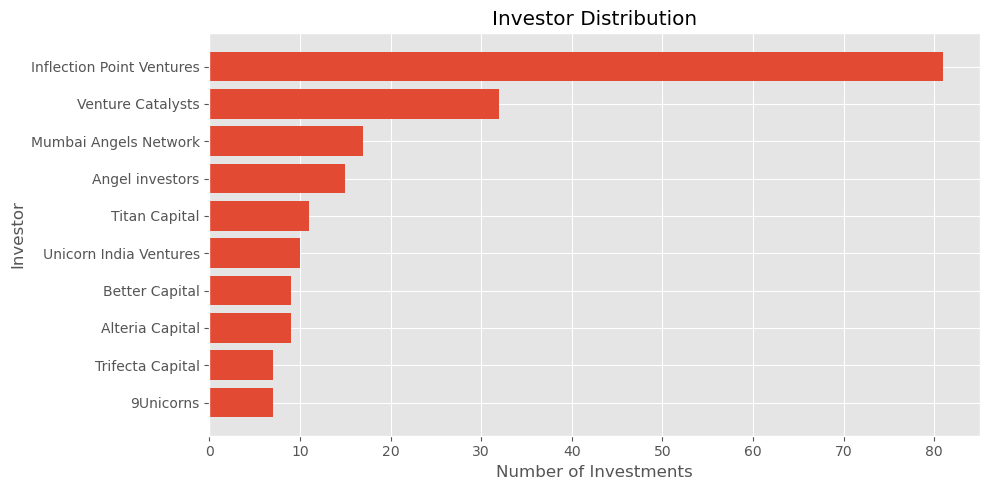

In [120]:
# lets see the distribution of the top 10 investors
plt.figure(figsize=(10, 5))
plt.barh(investor_count.index, investor_count.values)
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest bar on top
plt.xlabel('Number of Investments')
plt.ylabel('Investor')
plt.title('Investor Distribution')
plt.tight_layout()  # To prevent the labels from getting cut off
plt.show();

Inflection Point Ventures is the highest investor with 81 startups followed by Venture Catalysts and Mumbai Angels Network with 32 and 17 startups respectively.

##### Analysis of the founded attribute

In [121]:
df['Founded'].dtypes


dtype('int32')

In [122]:
# now lets have a look at the distribution of the founded column:
founded_year_count = df['Founded'].value_counts().sort_index().tail(11)
founded_year_count = founded_year_count.tail(11)
founded_year_count

2011     31
2012     45
2013     49
2014     95
2015    215
2016    868
2017    180
2018    233
2019    262
2020    256
2021     59
Name: Founded, dtype: int64

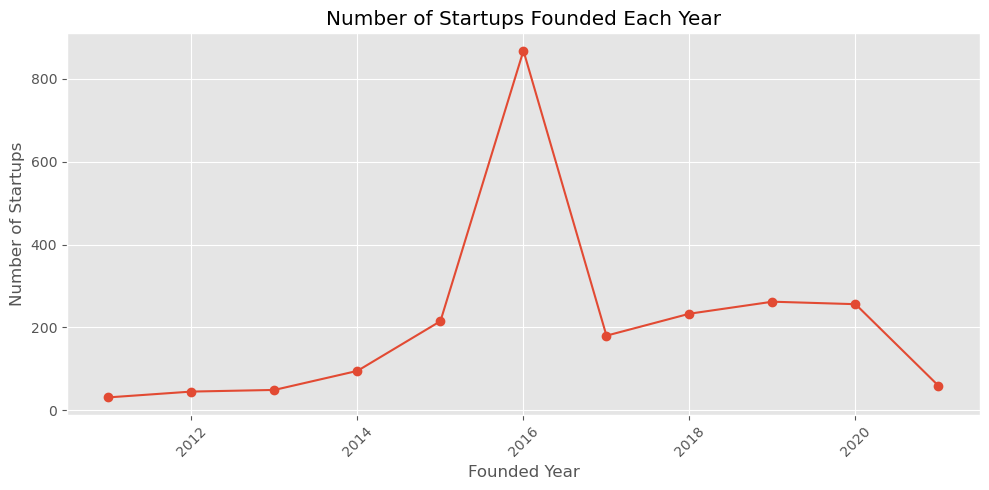

In [123]:
# lets see the distribution of the top 10 years which startups were founded

plt.figure(figsize=(10, 5))
plt.plot(founded_year_count.index, founded_year_count.values, marker='o', linestyle='-')
plt.xlabel('Founded Year')
plt.ylabel('Number of Startups')
plt.title('Number of Startups Founded Each Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

from the chart most startups were started in 2016 and could be as a result of imputing the missing values with mode value, which was 2016. We can deduce that between 2011 and 2016 the number of startups rose steadily within a plateau of about 800 startups in 2016. Numbers then declined in 2017 before rising slowly and again declining in 2020 with only 59 startups recorded in 2021.

BIVARIATE ANALYSIS

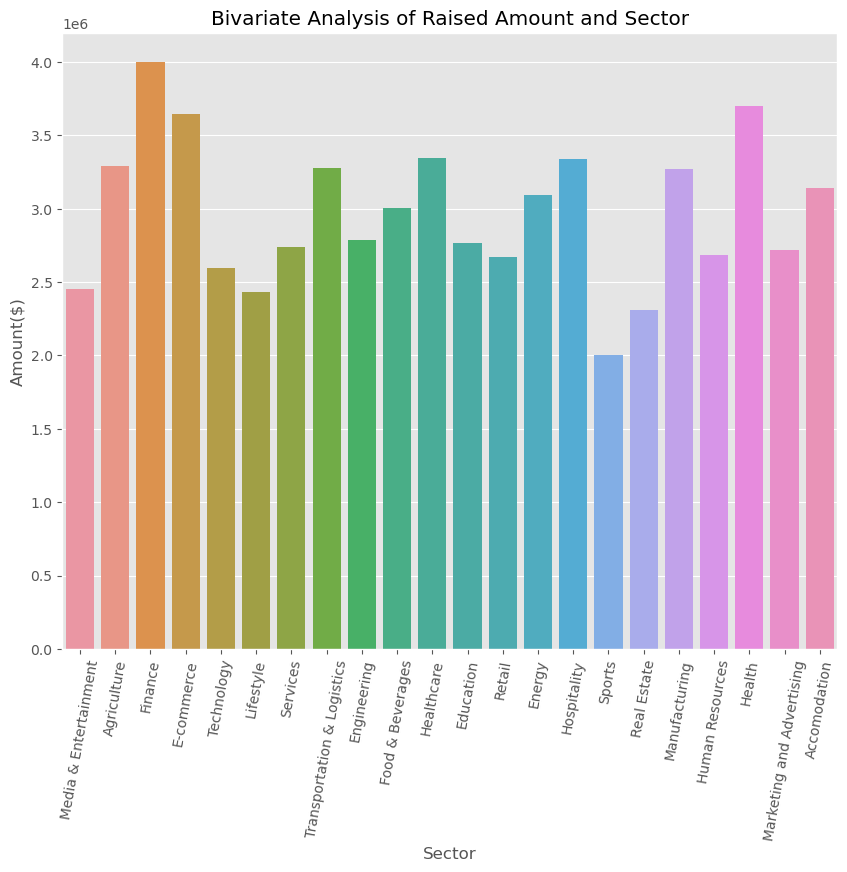

In [124]:
# now lets have a look at the relationship between sector and amount raised
plt.figure(figsize=(10, 8))
plt.xticks(rotation=80) 
sns.barplot(x=df['Sector'], y=df['Amount($)'], data=df, ci=None)
plt.title('Bivariate Analysis of Raised Amount and Sector')
plt.show()

The average amount raised for most sectors is below $3500000, except for Finance, E-commerce and Health with raised amount above $3500000

##### Releationship between Stage and amount of Funding raised

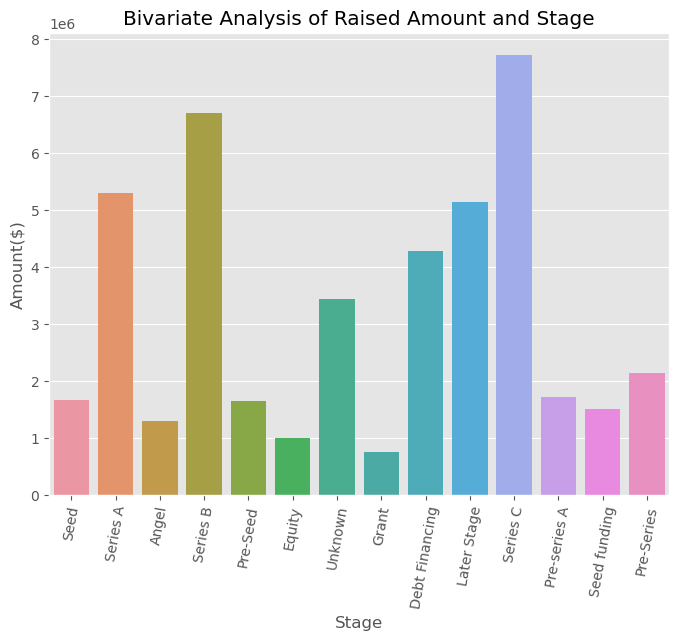

In [125]:
plt.figure(figsize=(8, 6))
plt.xticks(rotation=80) 
sns.barplot(x=df['Stage'], y=df['Amount($)'], data=df, ci=None)
plt.title('Bivariate Analysis of Raised Amount and Stage')
plt.show()

The average amount raised in most stages is below $4000000, with highest amounts raised at the series C, series B and series A stages respectively. We can deduce that at this stages a startup has likely achieved significant growth and success, and has more potential for greater growth which makes it more appealing to investors.

In [126]:
# now lets look at the relationship between stage of funding and startup sector
# Create a cross-tabulation (contingency table)
filtered3_df = df[df['Stage'] != 'Unknown']
cross_table = pd.crosstab(df['Sector'], filtered3_df['Stage'])

# Display the cross-tabulation
print(cross_table)

Stage                       Angel  Debt Financing  Equity  Grant  Later Stage  \
Sector                                                                          
Accomodation                    0               0       0      0            0   
Agriculture                     0               4       0      0            0   
E-commerce                      2               5       1      0            1   
Education                       1               3       0      0            2   
Energy                          1               0       0      0            0   
Engineering                     3               0       1      0            0   
Finance                         8              22       2      0           10   
Food & Beverages                4               1       0      0            1   
Health                          2               1       0      0            0   
Healthcare                      3               1       1      0            0   
Hospitality                 

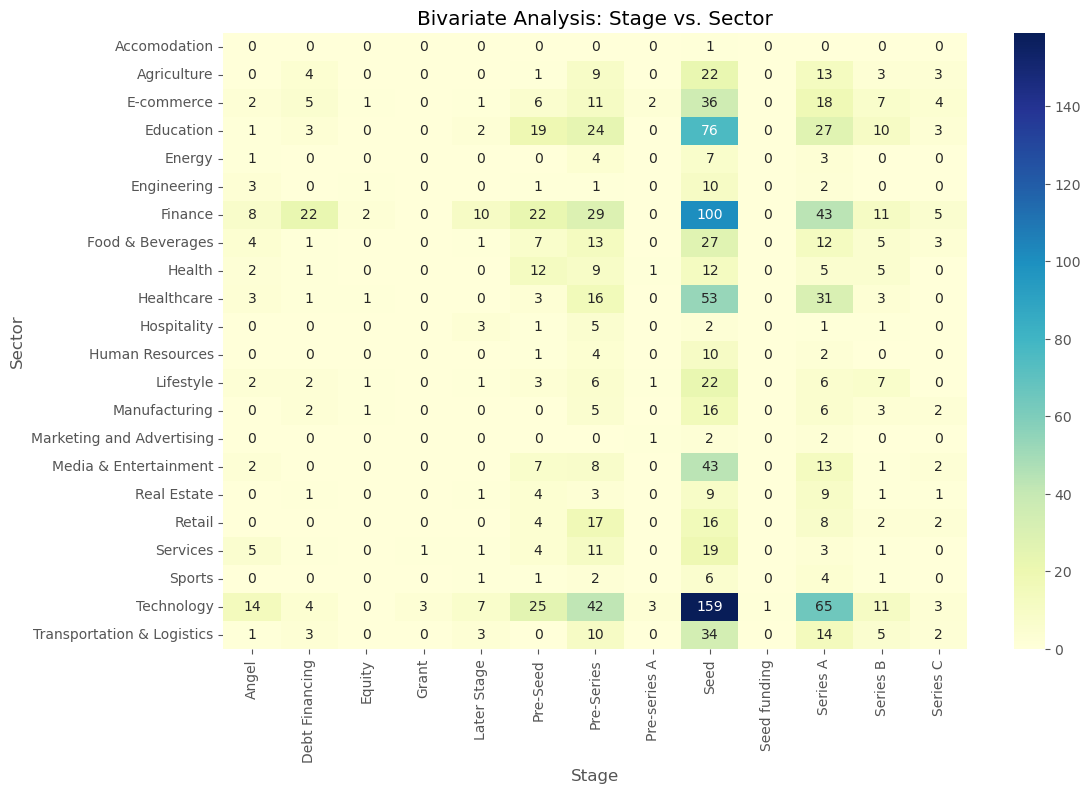

In [127]:
# Create a heatmap of the cross-tabulation
plt.figure(figsize=(12, 8))
sns.heatmap(cross_table, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Bivariate Analysis: Stage vs. Sector')
plt.xlabel('Stage')
plt.ylabel('Sector')
plt.show()

we can see that in most sectors, startups are funded at the seed stage, which is an early stage of funding that typically comes after the initial startup capital, which often comes from the founders' own savings or contributions from friends and family. we can also see that a few sectors are funded at the series A, pre-series and pre-seed stages stage where the startup has demonstrated some level of success and progress, proving its business model and gaining some traction in the market. only a handful sectors are funded at Angel stage and are mainly in the technology sector.

##### Relationship between startup age vs Funding amount received 

In [128]:
# calculate total funding amount BY startup Age
# Group by 'age' and calculate the sum of 'Amount($)' for each age
Amounts = df.groupby('Startup_Age')['Amount($)'].sum().reset_index()

Amount_totals = Amounts.sort_values(by='Startup_Age', ascending=False)
# Extract the data for plotting
Funding_mount = Amount_totals['Amount($)']
Age = Amount_totals['Startup_Age']
Amount_totals

,Startup_Age,Amount($)
27,42,1.500000e+07
26,32,6.000000e+06
25,27,3.000000e+06
24,26,6.000000e+06
23,25,3.000000e+06
22,23,6.000000e+05
21,22,1.800000e+07
20,21,1.900000e+07
19,19,9.700000e+06
18,18,4.000000e+06


Text(0.5, 1.0, 'Plot of Funding Amount Issued vs Age oF Startups')

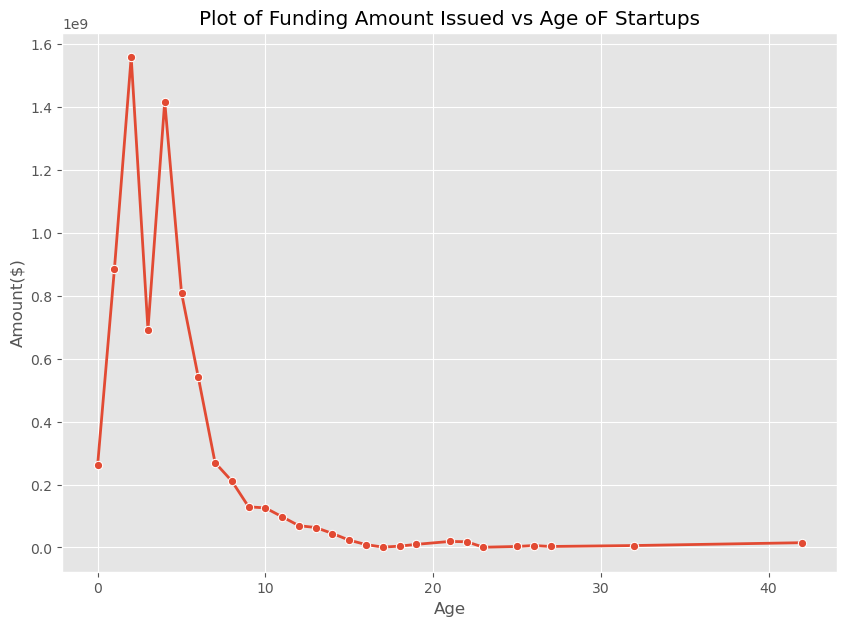

In [129]:
plt.figure(figsize=(10, 7))
sns.lineplot(x=Age, y=Funding_mount, data=df, marker='o', linewidth=2)
plt.xlabel('Age')
plt.ylabel('Amount($)')
plt.title('Plot of Funding Amount Issued vs Age oF Startups')

Based on the plot we can deduce that most startups seek investor funding within the first 10 years of business commencement.This is to establish themselves in the market, validate their business models, and set a strong foundation for future growth. Once established, there is need of less investor funding over rest of the years.

##### MULTIVARIATE ANALYSIS
Aswering the business questions

##### 1.To what extent do cities influence funding?

In [130]:
cities_grp = df.groupby('HeadQuarter')['Amount($)'].sum().reset_index()
top_10_locations = cities_grp.sort_values(by = 'Amount($)', ascending = False).head(10)
#top_5_locations = cities_grp.sort_values(by = 'Amount($)', ascending = False).head(5)
top_10_locations

,HeadQuarter,Amount($)
6,Bangalore,2.848391e+09
58,Mumbai,1.241584e+09
30,Gurugram,6.635285e+08
61,New Delhi,5.302770e+08
14,Chennai,3.011281e+08
74,Pune,2.589871e+08
18,Delhi,2.121522e+08
64,Noida,1.931570e+08
29,Gurgaon,1.778530e+08
34,Hyderabad,1.669010e+08


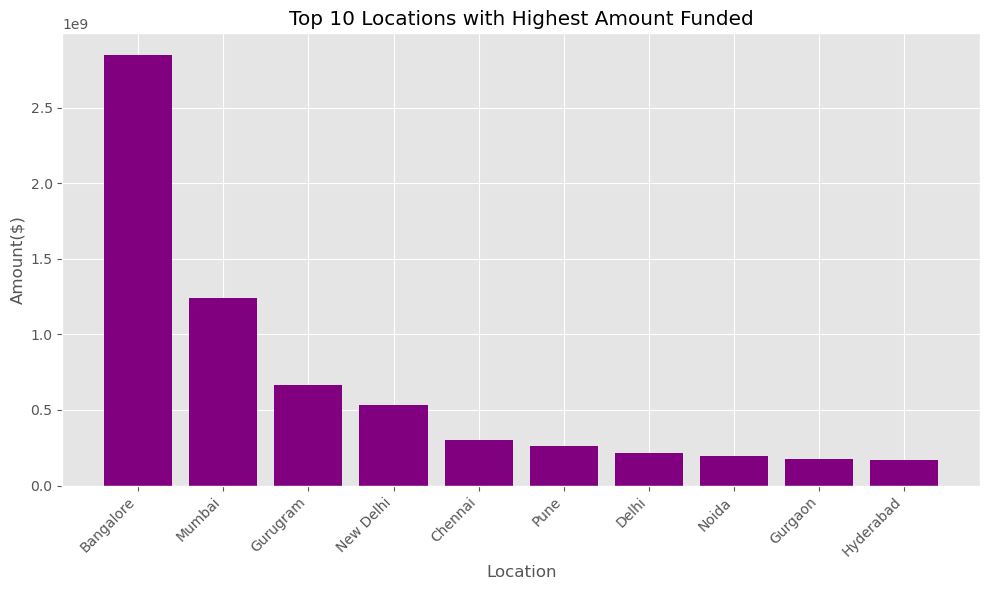

In [131]:
# lets visualize the top 10 locations
# Set up the figure and axis
plt.figure(figsize=(10, 6))
ax = plt.gca()
plt.bar(top_10_locations['HeadQuarter'], top_10_locations['Amount($)'], color='purple')
plt.xlabel('Location')
plt.ylabel('Amount($)')
plt.title('Top 10 Locations with Highest Amount Funded')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Bangalore is leading when it comes to startup funding with $2,848,391,000 total investments

#####  2.Which industries are preferred by investors for funding?

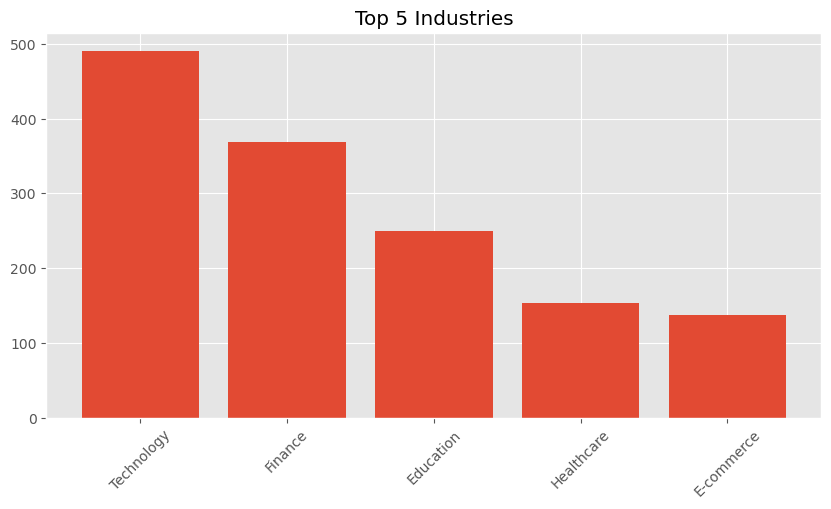

In [132]:
# lets look at the top 5 sectors 
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.bar(sector_count.index,sector_count.values, align='center')
plt.title('Top 5 Industries')
plt.show();

Technology, Finance, Education, Healthcare and E-commerce are the most preferred sectors by investors

##### 3. At which stage do start-ups get more funding from investors?

In [133]:
# lets look at the stages that get more funding
#We will filter Unknown
stage_grp = df.groupby('Stage')['Amount($)'].sum().reset_index()
top_10_stages = stage_grp.sort_values(by = 'Amount($)', ascending = False).head(10)
top_10_stages = top_10_stages[top_10_stages['Stage']!='Unknown']
top_10_stages 

,Stage,Amount($)
10,Series A,1.519090e+09
8,Seed,1.133026e+09
11,Series B,5.158370e+08
6,Pre-Series,4.882044e+08
12,Series C,2.315597e+08
1,Debt Financing,2.138320e+08
5,Pre-Seed,1.985510e+08
4,Later Stage,1.590460e+08
0,Angel,6.235400e+07


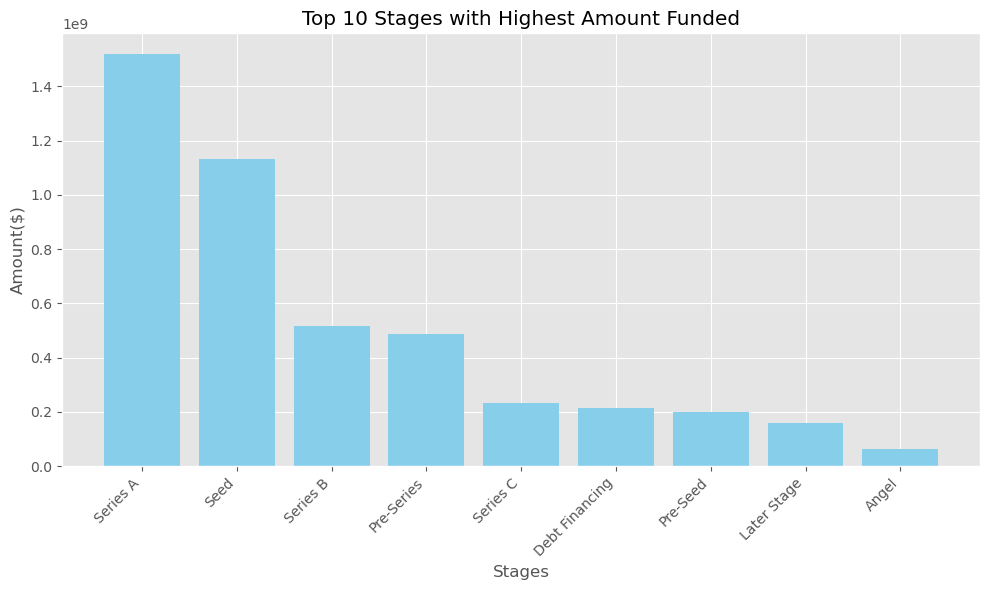

In [134]:
# lets visualize the top 10 locations
# Set up the figure and axis
plt.figure(figsize=(10, 6))
ax = plt.gca()
plt.bar(top_10_stages['Stage'], top_10_stages['Amount($)'], color='skyblue')
plt.xlabel('Stages')
plt.ylabel('Amount($)')
plt.title('Top 10 Stages with Highest Amount Funded')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Series A received the most amount of funding

##### 4. What is the typical funding amount that startups receive in India?

In [135]:
# lets look at the typical funding of indian startups by sector
sector_grp = df.groupby('Sector')['Amount($)'].sum().reset_index()
sectors = sector_grp.sort_values(by = 'Amount($)', ascending = False).head(20)
sectors

,Sector,Amount($)
6,Finance,1.474923e+09
20,Technology,1.271999e+09
3,Education,6.918947e+08
9,Healthcare,5.151081e+08
2,E-commerce,5.033768e+08
8,Health,3.404518e+08
21,Transportation & Logistics,3.374857e+08
7,Food & Beverages,3.362083e+08
15,Media & Entertainment,2.872050e+08
1,Agriculture,2.599000e+08


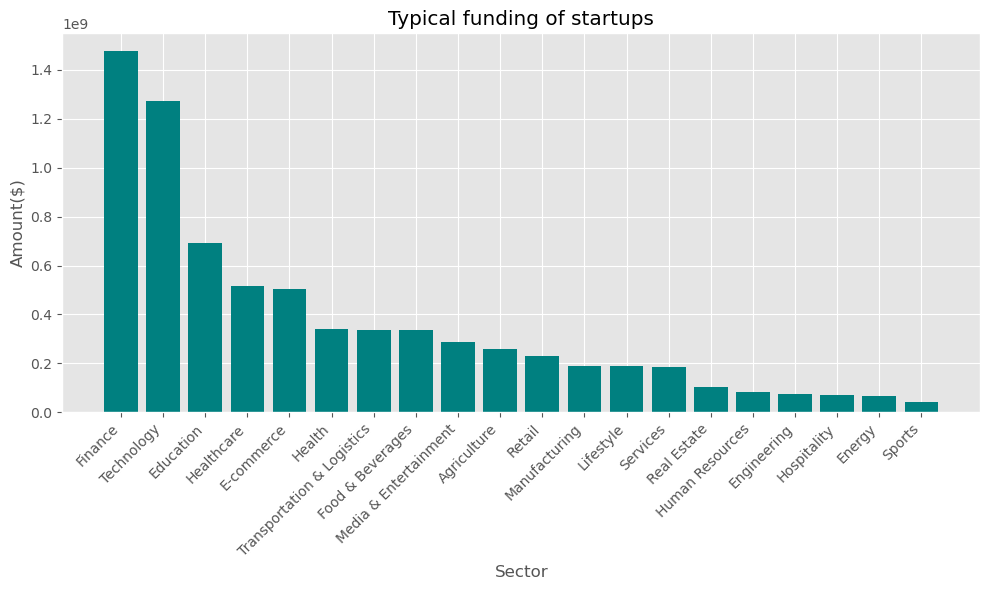

In [136]:
# lets visualize the funding of startups
# Set up the figure and axis
plt.figure(figsize=(10, 6))
ax = plt.gca()
plt.bar(sectors['Sector'], sectors['Amount($)'], color='teal')
plt.xlabel('Sector')
plt.ylabel('Amount($)')
plt.title('Typical funding of startups')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

in the indian startup, the typical funding amount varies across sectors, where finance and technology are the most funded, while sports and energy sectors are the least funded.

##### 5. Which type of investors invest the most money?

In [137]:
# A look at the investors that invest most money:

Investor_group = df.groupby('Investor')['Amount($)'].sum().reset_index()
Investor = Investor_group.sort_values(by='Amount($)', ascending = False).head(8)
Investor

,Investor,Amount($)
1433,unknown,909426491.0
566,Inflection Point Ventures,150925000.0
1078,Sequoia Capital India,97900000.0
1310,Venture Catalysts,85000000.0
394,Elevation Capital,41100000.0
807,Mumbai Angels Network,34113500.0
312,Chiratae Ventures,32700000.0
111,Alteria Capital,30020000.0


In [138]:
# Filter out the rows with 'unknown' in the 'Investor' column
Investor_filt = Investor[Investor['Investor'] != 'unknown']

Investor_filt

,Investor,Amount($)
566,Inflection Point Ventures,150925000.0
1078,Sequoia Capital India,97900000.0
1310,Venture Catalysts,85000000.0
394,Elevation Capital,41100000.0
807,Mumbai Angels Network,34113500.0
312,Chiratae Ventures,32700000.0
111,Alteria Capital,30020000.0


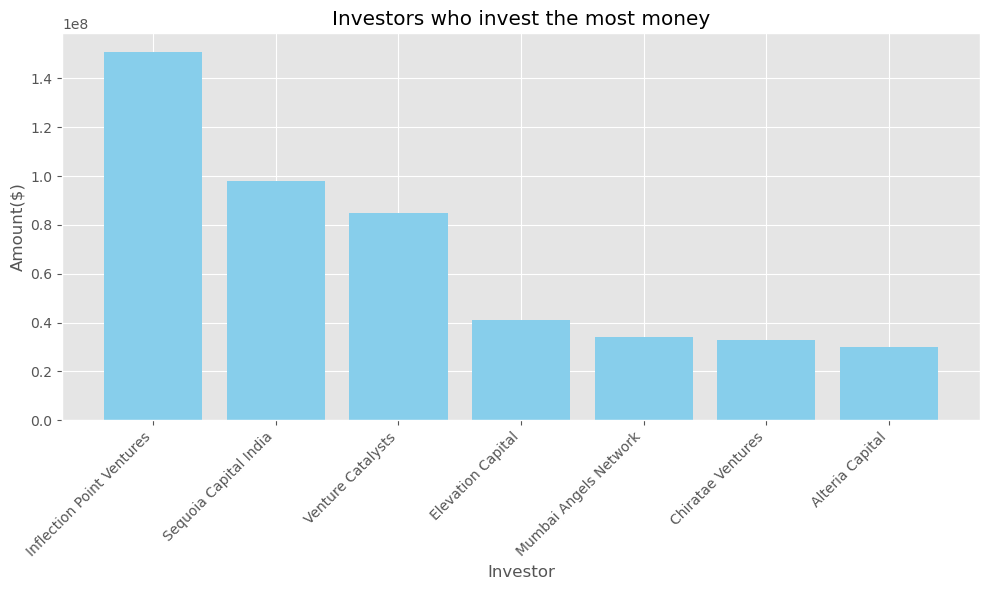

In [139]:
# lets visualize the investors
# Set up the figure and axis
plt.figure(figsize=(10, 6))
ax = plt.gca()
plt.bar(Investor_filt['Investor'], Investor_filt['Amount($)'], color='skyblue')
plt.xlabel('Investor')
plt.ylabel('Amount($)')
plt.title('Investors who invest the most money')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Inflection Point Ventures have invested the most money in the startups

Hypothesis Testing

In [140]:
#Test Hypothesis with Kruskal-Wallis Test

# Group data by location
grouped_data = df.groupby('HeadQuarter')['Amount($)'].apply(list)

# Perform Kruskal-Wallis Test
result = stats.kruskal(*grouped_data)

# Interpret the results
alpha = 0.05  # Set the significance level
p_value = result.pvalue

if p_value < alpha:
    print("Reject the null hypothesis (H_o). The location of a business affects the amount of funding received.")
else:
    print("Fail to reject the null hypothesis (H_o). The location of a business does not affect the amount of funding received.")

Reject the null hypothesis (H_o). The location of a business affects the amount of funding received.


## Conclusion

Statistics proved that the location of a business significantly affects the amount of funding received.


## Recommendation
Investors who want to venture into India startup ecosystem should look for a strategic business location with the highest likelihood to get. This is in addition to other factors including sector of interest and stage of funding. Bangalore is the city with highest probability of a startup to receive funding.

In [141]:
#Saving a copy of .csv file to working directory
df.to_csv('Indian_startup_analysis(clean_data).csv')